In [1]:
import torch
import torchvision

print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)
print("CUDA available?:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0))

torch: 2.4.1+cu124
torchvision: 0.19.1+cu124
CUDA available?: True
GPU: NVIDIA A40


In [2]:
# -----------------------------
# 0. (필요 시) 패키지 설치
# -----------------------------
!pip install --upgrade \
    diffusers>=0.18.0 transformers accelerate safetensors \
    pillow matplotlib


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
# -----------------------------
# 1. 라이브러리 임포트
# -----------------------------
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt
import os

In [4]:
# -----------------------------
# 2. 디바이스 설정
# -----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"[Device] {device}")

[Device] cuda


In [5]:
# -----------------------------
# 3. 모델 로드
# -----------------------------
# - safetensors 포맷으로 로드해 보안 이슈 회피
# - float16 모드로 메모리 절감
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True
).to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
# -----------------------------
# 4. 시드 설정 함수
# -----------------------------
def set_seed(seed: int):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [7]:
# -----------------------------
# 5. 단일 이미지 생성
# -----------------------------
# set_seed(42)  # 재현 가능한 결과를 위해 시드 고정
prompt = "A serene landscape of mountains during sunrise, digital art"
result = pipe(
    prompt,
    num_inference_steps=50,   # 샘플링 스텝 수
    guidance_scale=7.5        # 텍스트-이미지 정합도 조정
)
image: Image.Image = result.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

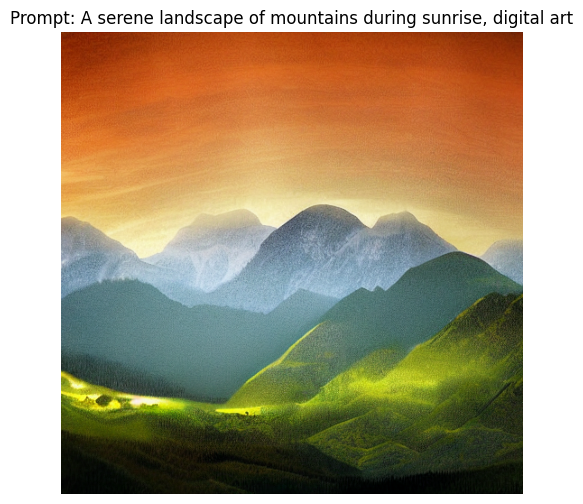

In [8]:
# 6. 결과 시각화
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Prompt: " + prompt)
plt.show()

In [9]:
# 7. 배치(batch) 이미지 생성
prompts = [
    "A futuristic city skyline at sunset",
    "A portrait of a medieval knight in armor",
    "A colorful abstract painting with geometric shapes"
]
# set_seed(123)
batch_results = pipe(
    prompts,
    num_inference_steps=40,
    guidance_scale=8.0
)
images = batch_results.images  # 리스트 형태로 반환

  0%|          | 0/40 [00:00<?, ?it/s]

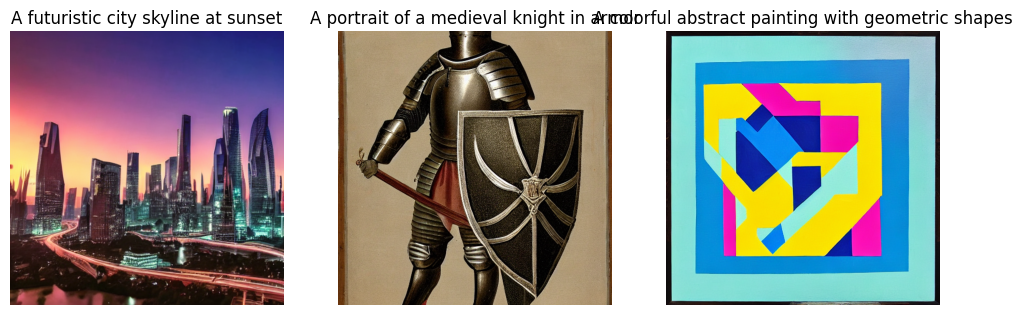

In [10]:
# 8. 배치 결과 시각화
n = len(images)
plt.figure(figsize=(4*n, 4))
for i, img in enumerate(images):
    plt.subplot(1, n, i+1)
    plt.imshow(img)
    plt.title(prompts[i])
    plt.axis("off")
plt.show()

In [11]:
# -----------------------------
# 9. 파일로 저장
# -----------------------------
os.makedirs("sd_outputs", exist_ok=True)
filename = "sd_outputs/sd_single_42.png"
image.save(filename)
print(f"✅ 단일 이미지 저장: {filename}")

for idx, img in enumerate(images):
    path = f"sd_outputs/sd_batch_{idx}.png"
    img.save(path)
    print(f"✅ 배치 이미지 저장: {path}")


✅ 단일 이미지 저장: sd_outputs/sd_single_42.png
✅ 배치 이미지 저장: sd_outputs/sd_batch_0.png
✅ 배치 이미지 저장: sd_outputs/sd_batch_1.png
✅ 배치 이미지 저장: sd_outputs/sd_batch_2.png
